In [1]:
# import nltk
# from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from stop_words import get_stop_words
import requests
import csv
import pandas as pd
import numpy as np
import datetime as dt
# url = 'https://datos.cdmx.gob.mx/api/3/action/datastore_search?resource_id=48fcb848-220c-4af0-839b-4fd8ac812c0f'  
url = 'https://archivo.datos.cdmx.gob.mx/fiscalia-general-de-justicia/carpetas-de-investigacion-fgj-de-la-ciudad-de-mexico/carpetas_ss_junio2020.csv'

C:\Users\Ideapad\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
# sw = set(stopwords.words('spanish'))
# nltk.download()
sw = list(get_stop_words('es'))

In [3]:
# response = urlopen(url)
req = requests.get(url)

In [4]:
url_content = req.content

In [5]:
csv_file = open('downloaded.csv', 'wb')

In [6]:
csv_file.write(url_content)

290778238

In [7]:
csv_file.close()

In [8]:
df = pd.read_csv('downloaded.csv')

In [9]:
df

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,longitud,latitud,tempo
0,2016.0,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,LAGO PTE.,AMÉRICAS UNIDAS,BENITO JUAREZ,-99.140215,19.380315,NaN
1,2016.0,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01 00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,GRANJEROS,LOS CIPRESES,IZTAPALAPA,-99.108403,19.352859,NaN
2,2016.0,Febrero,2016-02-01 00:30:00,2016,Febrero,2016-02-01 01:33:26,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",57,UI-3CD,DELITO DE BAJO IMPACTO,BATALLONES ROJOS,NaN,UNIDAD VICENTE GUERRERO,IZTAPALAPA,-99.061321,19.356451,NaN
3,2016.0,Enero,2016-01-31 22:00:00,2016,Febrero,2016-02-01 02:09:11,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-3CD,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,GERANIO,GAVILLEROS,EMILIANO ZAPATA,IZTAPALAPA,-98.976379,19.331633,NaN
4,2015.0,Diciembre,2015-12-25 12:00:00,2016,Febrero,2016-02-01 02:16:49,DENUNCIA DE HECHOS,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-3SD,HECHO NO DELICTIVO,SAN FRANCISCO,AVENIDA COLONIA DEL VALLE,DEL VALLE CENTRO,BENITO JUAREZ,-99.172189,19.387114,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030757,2020.0,Junio,2020-06-30 23:00:00,2020,Junio,2020-06-30 23:38:59,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN GUSTA...,GAM-6,UI-1CD,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,CLAVE,PUCINNI,VALLEJO,GUSTAVO A MADERO,-99.134871,19.466284,NaN
1030758,2020.0,Junio,2020-06-29 03:30:00,2020,Junio,2020-06-30 23:39:20,FRAUDE,UNIDAD DE RECEPCIÓN POR INTERNET,CEN-1,Unidad de Investigación 1 S/D,DELITO DE BAJO IMPACTO,AV UNIVERSIDAD,INDUSTRIA,AXOTLA,ALVARO OBREGON,-99.172309,19.358334,NaN
1030759,2019.0,Diciembre,2019-12-20 22:30:00,2020,Junio,2020-06-30 23:46:02,NEGACION DEL SERVICIO PUBLICO,FISCALÍA PARA LA INVESTIGACIÓN DE LOS DELITOS ...,B,UI-1CD,DELITO DE BAJO IMPACTO,AV- MEMXICO,AV. TOLUCA Y TLAXCALA (FISCALIA DE INVESTIGACI...,PROGRESO,ALVARO OBREGON,-99.201685,19.339645,NaN
1030760,2020.0,Junio,2020-06-30 18:40:00,2020,Junio,2020-06-30 23:47:25,AMENAZAS,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN CUAUH...,CUH-2,UI-1SD,DELITO DE BAJO IMPACTO,PEDRO MORENO,AV. PASEO DE LA REFORMA,GUERRERO,CUAUHTEMOC,-99.143585,19.441199,NaN


1 .- ¿Qué pruebas identificarías para asegurar la calidad de estos datos?

#### Missing Data

Se verifica que campos cuentan con valores faltantes y en que propociòn ya que esto determinara si es necesario excluirlas del anàlisis.

In [10]:
df.isnull().sum()/df.shape[0]  ### Con esto se sugiere excluir los campos tempo, competencia, calle_hechos2.

ao_hechos               0.000388
mes_hechos              0.000388
fecha_hechos            0.000388
ao_inicio               0.000000
mes_inicio              0.000000
fecha_inicio            0.000000
delito                  0.000000
fiscalia                0.000002
agencia                 0.000000
unidad_investigacion    0.000220
categoria_delito        0.000000
calle_hechos            0.002662
calle_hechos2           0.602402
colonia_hechos          0.040255
alcaldia_hechos         0.003007
longitud                0.039317
latitud                 0.039317
tempo                   1.000000
dtype: float64

In [11]:
df.drop(columns=['tempo', 'calle_hechos2'], inplace= True)

In [12]:
df_r = df.dropna(subset=['colonia_hechos', 'unidad_investigacion','calle_hechos','ao_hechos','longitud']).copy()

In [13]:
df_r.isnull().sum()/df_r.shape[0]

ao_hechos               0.0
mes_hechos              0.0
fecha_hechos            0.0
ao_inicio               0.0
mes_inicio              0.0
fecha_inicio            0.0
delito                  0.0
fiscalia                0.0
agencia                 0.0
unidad_investigacion    0.0
categoria_delito        0.0
calle_hechos            0.0
colonia_hechos          0.0
alcaldia_hechos         0.0
longitud                0.0
latitud                 0.0
dtype: float64

In [14]:
df_r.shape[0]/df.shape[0]

0.957583806931183

In [15]:
df_r['id'] = range(0,df_r.shape[0])

In [16]:
# df_r.tail()
del df

In [17]:
df_r.describe([round(x,1) for x in np.arange(0.1, 1.0, 0.1)])

,ao_hechos,ao_inicio,longitud,latitud,id
count,987041.000000,987041.000000,987041.000000,987041.000000,987041.000000
mean,2017.687854,2017.828950,-99.137400,19.387643,493520.000000
std,1.577975,1.258924,0.060542,0.109624,284934.337861
min,1906.000000,2016.000000,-102.000000,0.000000,0.000000
10%,2016.000000,2016.000000,-99.206382,19.294880,98704.000000
20%,2016.000000,2017.000000,-99.184371,19.327550,197408.000000
30%,2017.000000,2017.000000,-99.167420,19.353810,296112.000000
40%,2017.000000,2017.000000,-99.154141,19.373084,394816.000000
50%,2018.000000,2018.000000,-99.142413,19.390880,493520.000000
60%,2018.000000,2018.000000,-99.129004,19.411570,592224.000000


In [18]:
df_r = df_r[df_r.ao_hechos>2015]

In [19]:
def normalize(s):
    replacements = (
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
    )
    for a, b in replacements:
        s = s.replace(a, b).replace(a.upper(), b.upper())
    return s

In [20]:
def word_clean(x):
    word_tokens = word_tokenize(x.lower())
    filtered_sentence = [normalize(w).upper() for w in word_tokens if not w in sw]
#     joined_sentence = "|".join(filtered_sentence)
#     return joined_sentence
    return filtered_sentence

In [21]:
df_r['delito_cl'] = [word_clean(x) for x in df_r.delito]

In [22]:
df_r["n_count"] = df_r["delito_cl"].str.len()

In [23]:
for i in range(df_r["n_count"].max()):

    df_r[f"delito_{i}"] = df_r.apply(lambda x:x["delito_cl"][i] if x["n_count"] >= i+1 else np.nan, axis = 1)
    aux = df_r[["id", f"delito_{i}"]].rename(columns={f"delito_{i}": "delito_"})
    if i == 0:
        delito_desc = aux.copy()
    else:
        delito_desc = delito_desc.append(aux)

In [24]:
delito_desc['cont'] = 1

In [25]:
del_desc = pd.pivot_table(delito_desc.dropna(),values='cont',columns=['delito_'],index=['id'], aggfunc=np.sum)

In [26]:
# list(del_desc.columns)

In [27]:
ls_select = ['ABANDONO', 'ABORTO', 'ABUSIVO', 'ABUSO', 'ACCIDENTE', 'ACOSO', 'AGRAVADO', 'AGREDIR', 'AHOGAMIENTO', 'AHORCAMIENTO',
             'ALCOHOLICA', 'ALIMENTARIA', 'ALIMENTOS', 'ALLANAMIENTO', 'ALTERACION', 'AMENAZAS', 'ANIMAL', 'ANIMALES',
             'ANONIMAS', 'APOLOGIA', 'APORTE', 'ARMA', 'ARMA/PROHIB', 'ARMAS', 'ASALTO', 'ASFIXIA', 'ASOCIACION', 
             'ATAQUE', 'ATAQUES', 'ATROPELLADO', 'BEBIDAS', 'BIENES', 'BIGAMIA', 'CADAVERES', 'CAIDA', 'CALUMNIAS', 'CARDIACO',
             'CASA', 'CIVIL', 'COACCION', 'COALICIÓN', 'COBRANZA', 'COHECHO', 'COLABORACION', 'COLISION', 'COMERCIALIZACION',
             'COMERCIO', 'CONCUSION','CONDUCTA', 'CONDUCTOR', 'CONGESTION','CONTAMINACIÓN', 'CONTENEDEROS', 'CONTENEDORES', 
             'CORRUPCION', 'CORRUPCIÓN', 'CORTANTE', 'CREDITO', 'CUIDADO', 'CULPOSA', 'CULPOSAS', 'CULPOSO', 'CULPOSOS',
             'DDH', 'DECLARACIONES', 'DELICTUOSA', 'DELINCUENCIA', 'DELITO', 'DELITOS', 'DENUNCIA', 'DESACATO', 'DESAPARICION',
             'DESOBEDENCIA', 'DESOBEDIENCIA', 'DESPOJO', 'DIFAMACION', 'DISCAPACIDAD', 'DISCAPACITADO', 'DISCRIMINACION', 'DISPARO',
             'DISPAROS', 'DOLOSAS', 'DOLOSO', 'EJECUTE', 'ENAJENACION', 'ENCUBRIMIENTO', 'ENRIQUECIMIENTO', 'ENVENENAMIENTO',
             'ESTUPRO', 'EVASION', 'EXHORTOS', 'EXHUMACION', 'EXHUMACIONES', 'EXPLOSIVOS', 'EXPLOTACION', 'EXPOSICION', 'EXTORSION',
             'EXTRACCION', 'EXTRAVIADAS', 'FABRICACION', 'FALSEDAD', 'FALSIFICACION', 'FARDEROS', 'FDS', 'FEDERAL', 'FEDERALES', 
             'FEMINICIDIO', 'FORZADA', 'FORANEO', 'FRAUDE', 'FUEGO', 'FUERZA', 'FISICA', 'GENERAL', 'GENERALES', 'GESTION', 
             'GOLPES', 'HECHO', 'HECHOS', 'HOMICIDIO', 'HOMICIDIOS', 'ILEGAL', 'ILEGITIMA','ILICITA', 'ILICITO', 'IMPORTACION',
             'IMPRESION', 'INCAPACES', 'INCESTO', 'INCOMPETENCIA', 'INDEBIDA', 'INDEBIDO',
             'INHUMACION', 'INHUMACIONES', 'INTENCIONAL', 'INTENCIONALES', 'INTIMIDACION', 'INTIMIDAD', 'INTOXICACION', 'INVASION',
             'LENOCINIO', 'LESIONES', 'MALTRATO', 'MENOR', 'MENORES', 'MENTAL', 'MOTIN', 'NARCOMENUDEO', 'OBLIGACION', 'OMISION',
             'OPERACIONES', 'OPONGA', 'OPOSICION', 'PECULADO', 'PELIGRO', 'PENSION', 'PERDIDA', 'PLAGIO', 'PORNOGRAFIA',
             'PORTACION', 'PORTADOR', 'POSESION', 'PRESOS', 'PRIVACION', 'PROCEDENCIA', 'PUNZO','QUEBRANTAMIENTO', 'QUEMADURA', 
             'QUEMADURAS', 'REDES', 'ROBADO', 'ROBO', 'SABOTAJE', 'SECRETOS', 'SEXUAL', 'SUSTRACCION', 'SUSTRACCIÓN', 'TALA', 
             'TENTATIVA', 'TORTURA', 'TRABAJO', 'TRAFICO', 'TRANSEUNTE', 'TRANSITO', 'TRANSPORTE', 'TRANSPORTISTA', 'TRASLADO', 
             'TRATA', 'ULTRAJES', 'USURPACION', 'UTILIZACION', 'VENERERO','VENTA', 'VIOLENCIA']

In [28]:
del_desc.columns
del delito_desc

In [29]:
ls_categoria_delito = list(df_r.categoria_delito.unique())

In [30]:
df_r = pd.get_dummies(df_r, columns=['categoria_delito'])

In [31]:
df_r.columns = [x.replace('categoria_delito_','') for x in df_r.columns]

In [32]:
df_r.drop(columns=['delito_0', 'delito_1',
       'delito_2', 'delito_3', 'delito_4', 'delito_5', 'delito_6', 'delito_7',
       'delito_8', 'delito_9', 'delito_10', 'delito_11', 'delito_12',
       'delito_13', 'delito_14', 'delito_15', 'delito_16', 'delito_17',], inplace=True)

In [33]:
df_r.head()

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,...,ROBO A NEGOCIO CON VIOLENCIA,ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA,ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA,ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SECUESTRO,VIOLACIÓN
0,2016.0,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,...,0,0,0,0,0,0,0,0,0,0
1,2016.0,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01 00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,...,0,0,0,0,0,0,0,1,0,0
2,2016.0,Febrero,2016-02-01 00:30:00,2016,Febrero,2016-02-01 01:33:26,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",57,UI-3CD,...,0,0,0,0,0,0,0,0,0,0
3,2016.0,Enero,2016-01-31 22:00:00,2016,Febrero,2016-02-01 02:09:11,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-3CD,...,0,0,0,0,0,1,0,0,0,0
5,2016.0,Febrero,2016-02-01 01:30:00,2016,Febrero,2016-02-01 02:19:12,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...,INVESTIGACIÓN EN CUAUHTEMOC,CUH-2,UI-3CD,...,0,0,0,0,0,0,0,0,0,0


In [34]:
agg_delitos = df_r[ls_categoria_delito + ['ao_hechos']].groupby(['ao_hechos'], as_index= False).agg(['mean'])

In [35]:
# agg_delitos.reset_index(inplace=True)

In [36]:
agg_delitos.columns = ["".join(x).replace('mean','') for x in agg_delitos.columns]

In [37]:
import matplotlib.pyplot as plt

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000272BBA6C3C8>,
      dtype=object)

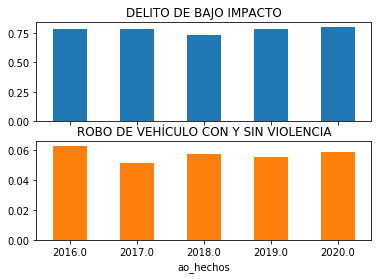

In [38]:
agg_delitos.iloc[:,0:2].plot.bar(rot=0, subplots=True,legend=False)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000272BBBA1438>,
      dtype=object)

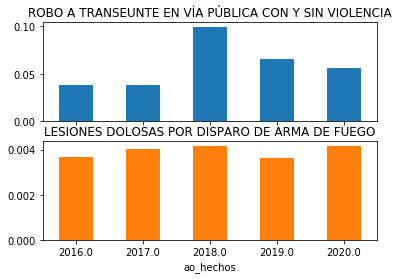

In [39]:
agg_delitos.iloc[:,2:4].plot.bar(rot=0, subplots=True,legend=False)

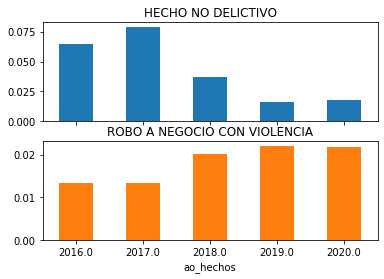

In [40]:
axes2 = agg_delitos.iloc[:,4:6].plot.bar(rot=0, subplots=True,legend=False)

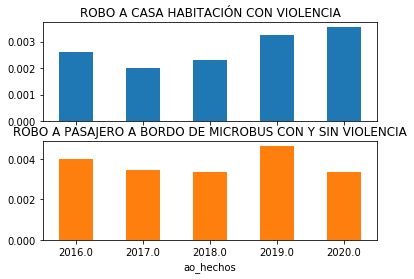

In [41]:
axes2 = agg_delitos.iloc[:,6:8].plot.bar(rot=0, subplots=True,legend=False)

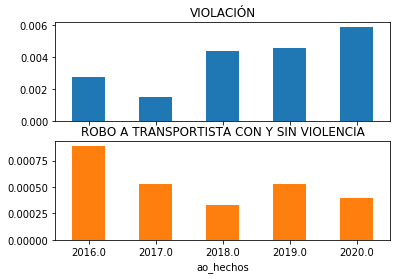

In [42]:
axes2 = agg_delitos.iloc[:,8:10].plot.bar(rot=0, subplots=True,legend=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000272CAAE7A58>,
      dtype=object)

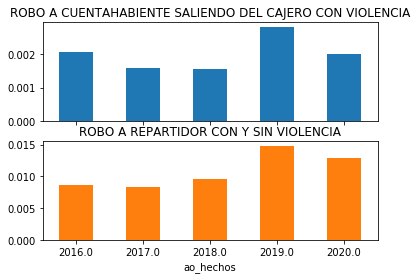

In [43]:
agg_delitos.iloc[:,10:12].plot.bar(rot=0, subplots=True,legend=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000272CAAF7A58>,
      dtype=object)

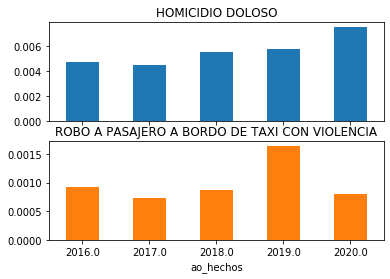

In [44]:
agg_delitos.iloc[:,12:14].plot.bar(rot=0, subplots=True,legend=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000272CAC9D400>,
      dtype=object)

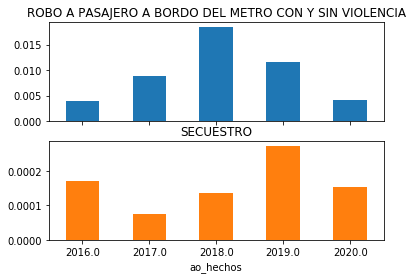

In [45]:
agg_delitos.iloc[:,14:16].plot.bar(rot=0, subplots=True,legend=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000272CAC40320>],
      dtype=object)

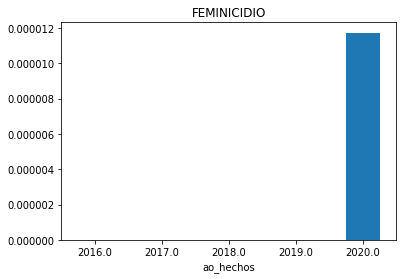

In [46]:
agg_delitos.iloc[:,16:18].plot.bar(rot=0, subplots=True,legend=False)

# ¿Qué pruebas identificarías para asegurar la calidad de estos datos? No es necesario hacerlas, sólo describe la prueba y lo que te dice cada una.

Como se mostro, para asegurar la calidad se revisaria valores faltantes, campos unarios.

Para pruebas estadísticas se optaría por:

 - La prueba Chi cuadrada para saber si hay algun cambio significativo. 
 - La prueba KS para verificar la distribución de los datos sea similar.



# Identifica los delitos que van a la alza y a la baja en la CDMX

Apoyandose de las graficas, si bien la proporción es baja en cuanto a la aparición de delitos 
se nota que aquellos que tienen una baja son :
    - Robo a transportista
    - Robo a pasajero

De igual manera aquellos que han aumentado son:
    - Robo a negocio
    - Robo a casa habitacion
    - Robo a repartidor
    - Homicidio/ Feminicidio

# ¿Cuál es la alcaldía que más delitos tiene y cuál es la que menos? ¿Por qué crees que sea esto?

In [47]:
df_r['alcaldia_hechos'].value_counts(1, dropna = False)

CUAUHTEMOC                0.155440
IZTAPALAPA                0.150752
GUSTAVO A MADERO          0.100740
BENITO JUAREZ             0.086879
COYOACAN                  0.068125
ALVARO OBREGON            0.068045
MIGUEL HIDALGO            0.067126
TLALPAN                   0.059241
VENUSTIANO CARRANZA       0.058502
AZCAPOTZALCO              0.049801
IZTACALCO                 0.043632
XOCHIMILCO                0.031325
TLAHUAC                   0.023246
LA MAGDALENA CONTRERAS    0.015919
CUAJIMALPA DE MORELOS     0.014612
MILPA ALTA                0.006615
Name: alcaldia_hechos, dtype: float64

Como se muestra son Cuahutemoc e Iztapalapa aquellas con mayor proporcion de delitos asi como Milpa Alta aquella que se registra con menos, posiblemente gran parte de esta diferencia sea por el interes o seguimiento de los afectados para denunciar.

Tambien puede deberse a que estas alcaldías son aquellas de bastante afluencia ya que posiblemente son las que sirven como paso hacia las zonas de trabajo.

# ¿Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, día de la semana, quincenas) en la CDMX? ¿A qué crees que se deba?

In [48]:
df_r['fecha_hechos'] = pd.to_datetime(df_r.fecha_hechos)

In [49]:
df_r['fecha_hechos'] = df_r['fecha_hechos'].dt.date

In [50]:
df_r['mes_hechos'] = pd.Categorical(df_r.mes_hechos, ordered=True, categories=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
                                                          'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])

In [51]:
df_daily = df_r[['fecha_hechos']+ls_categoria_delito].copy().groupby('fecha_hechos', as_index = False).sum()

In [52]:
df_daily_2 = pd.melt(df_daily,id_vars=['fecha_hechos'],value_vars=ls_categoria_delito).groupby('fecha_hechos', as_index = False).sum()

In [53]:
df_daily_2['fecha_hechos'] = pd.to_datetime(df_daily_2['fecha_hechos'])
df_daily_2.set_index('fecha_hechos',inplace=True)

In [54]:
df_daily_2['Year'] = df_daily_2.index.year
df_daily_2['Month'] = df_daily_2.index.month
df_daily_2['Weekday Name'] = df_daily_2.index.day_name()

In [55]:
df_weekly_mean = df_daily_2['value'].resample('W').mean()

In [56]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})

C:\Users\Ideapad\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


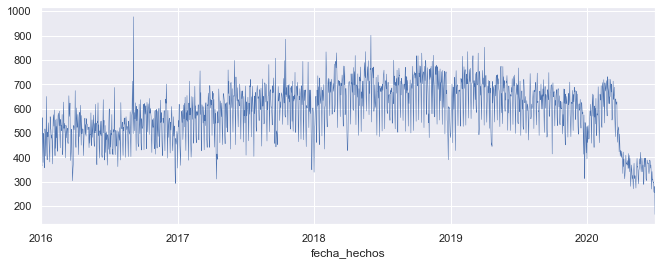

In [57]:
df_daily_2['value'].plot(linewidth=0.5);

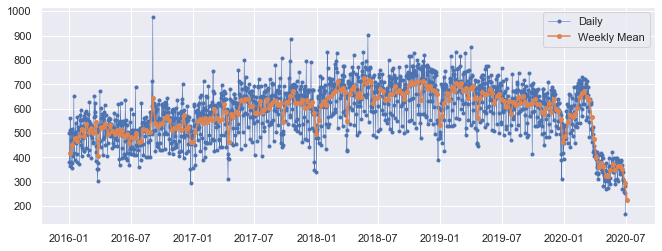

In [58]:
fig, ax = plt.subplots()
ax.plot(df_daily_2['value'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(df_weekly_mean,
marker='o', markersize=4, linestyle='-', label='Weekly Mean')
ax.legend();

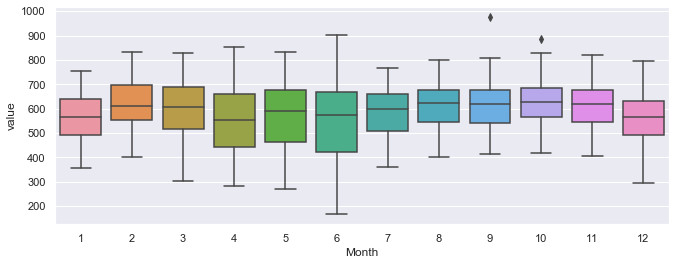

In [59]:
sns.boxplot(data=df_daily_2, x='Month', y='value')

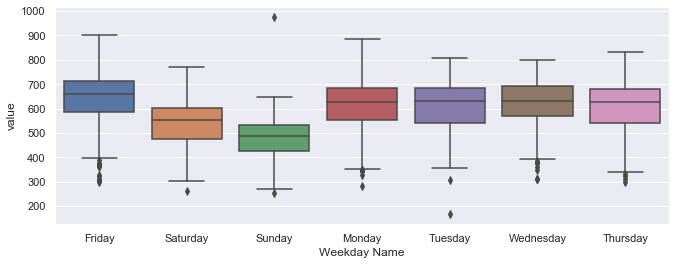

In [60]:
sns.boxplot(data=df_daily_2, x='Weekday Name', y='value')

En las evidencias anteriormente generadas, se nota una tendencia creciente hasta inicios del 2019, el cual durante ese año las cantidades empezaron a disminuir.

Sin embargo a inicios del 2020 se observa un repunte abrupto a niveles de años anteriores a 2019.

Cabe tomar en cuenta que es notoria la aparición de la pandemia generada por el COVID-19 ya que la caida estrepitosa observada, seguramente se debe a las medidas de confinamiento.

#### Estacionalidades iniciales

Durante los años se encuentra que existe una mayor cantidad de incidencias en Febrero y Marzo, ya que posiblemente vaya de la mano del retorno en fiestas decembrinas. Sin embargo en Junio es donde se observa una mayor amplitud, es decir cabe la posibilidad de que ciertas actividades incrementen como el robo de casa habitación debido al inicio de la temporada vacacional.

Contraintuitivamente, se nota una baja en Diciembre posibilemente debido a la epoca de las fiestas decembrinas y fin de año.

En cuanto al periodo semanal se encuentra que la mayoria de las incidencias ocurren en Viernes y se mantiene mas bajo en fines de semana.

# ¿Cuáles son los delitos que más caracterizan a cada alcaldía? Es decir, delitos que suceden con mayor frecuencia en una alcaldía y con menor frecuencia en las demás.

In [61]:
df_cdmx = df_r[['alcaldia_hechos']+ls_categoria_delito].copy().groupby(['alcaldia_hechos'], as_index = False).sum()

In [62]:
df_cdmx_2 = pd.melt(df_cdmx, id_vars=['alcaldia_hechos'], value_vars= ls_categoria_delito)

In [63]:
df_max = df_cdmx_2.groupby(['alcaldia_hechos']).agg({'value':['max']})

In [64]:
df_max.columns = ["".join(x).replace('max','') for x in df_max.columns]

In [65]:
df_max.reset_index(inplace=True)

In [66]:
df_max.merge(df_cdmx_2, how='left', on=['alcaldia_hechos','value'])

,alcaldia_hechos,value,variable
0,ALVARO OBREGON,51861.0,DELITO DE BAJO IMPACTO
1,AZCAPOTZALCO,37485.0,DELITO DE BAJO IMPACTO
2,BENITO JUAREZ,69920.0,DELITO DE BAJO IMPACTO
3,COYOACAN,53112.0,DELITO DE BAJO IMPACTO
4,CUAJIMALPA DE MORELOS,12406.0,DELITO DE BAJO IMPACTO
5,CUAUHTEMOC,117188.0,DELITO DE BAJO IMPACTO
6,GUSTAVO A MADERO,71921.0,DELITO DE BAJO IMPACTO
7,IZTACALCO,30868.0,DELITO DE BAJO IMPACTO
8,IZTAPALAPA,103795.0,DELITO DE BAJO IMPACTO
9,LA MAGDALENA CONTRERAS,12798.0,DELITO DE BAJO IMPACTO


In [67]:
df_min = df_cdmx_2.groupby(['alcaldia_hechos']).agg({'value':['min']})
df_min_2 = df_cdmx_2[df_cdmx_2.value>0].groupby(['alcaldia_hechos']).agg({'value':['min']})

In [68]:
df_min.columns = ["".join(x).replace('min','') for x in df_min.columns]
df_min_2.columns = ["".join(x).replace('min','') for x in df_min_2.columns]

In [69]:
df_min.reset_index(inplace=True)
df_min_2.reset_index(inplace=True)

In [70]:
df_min.merge(df_cdmx_2, how='left', on=['alcaldia_hechos','value'])

,alcaldia_hechos,value,variable
0,ALVARO OBREGON,0.0,FEMINICIDIO
1,AZCAPOTZALCO,0.0,FEMINICIDIO
2,BENITO JUAREZ,1.0,FEMINICIDIO
3,COYOACAN,0.0,FEMINICIDIO
4,CUAJIMALPA DE MORELOS,0.0,FEMINICIDIO
5,CUAUHTEMOC,0.0,FEMINICIDIO
6,GUSTAVO A MADERO,0.0,FEMINICIDIO
7,IZTACALCO,0.0,FEMINICIDIO
8,IZTAPALAPA,0.0,FEMINICIDIO
9,LA MAGDALENA CONTRERAS,0.0,ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA


In [71]:
df_min_2.merge(df_cdmx_2, how='left', on=['alcaldia_hechos','value'])

,alcaldia_hechos,value,variable
0,ALVARO OBREGON,3.0,ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA
1,AZCAPOTZALCO,5.0,SECUESTRO
2,BENITO JUAREZ,1.0,FEMINICIDIO
3,COYOACAN,6.0,SECUESTRO
4,CUAJIMALPA DE MORELOS,1.0,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...
5,CUAUHTEMOC,17.0,SECUESTRO
6,GUSTAVO A MADERO,16.0,SECUESTRO
7,IZTACALCO,4.0,SECUESTRO
8,IZTAPALAPA,48.0,SECUESTRO
9,LA MAGDALENA CONTRERAS,2.0,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...


Como el delito de mayor frecuencia en general son aquellos denominados de Bajo Impacto.

El de menor frecuencia, tecnicamente sería el tipificado como Feminicidio pero debido a su reciente adición se omitirá,
ya que no se tiene suficiente información.

Por lo que se realizo un nuevo analisis respecto a los restantes

- ROBO A PASAJERO A BORDO DEL METRO:
 - CUAJIMALPA DE MORELOS 
 - LA MAGDALENA CONTRERAS 
 - MILPA ALTA 
 - TLALPAN 
 - XOCHIMILCO
     
- SECUESTRO:
 - AZCAPOTZALCO
 - COYOACAN
 - CUAUHTEMOC
 - GUSTAVO A MADERO 
 - IZTACALCO 
 - IZTAPALAPA
    
- ROBO A TRANSPORTISTA: 
 - ALVARO OBREGON
 - TLAHUAC
 
- FEMINICIDIO :
 - BENITO JUAREZ

# Diseña un indicador que mida el nivel de “inseguridad”. Genéralo al nivel de desagregación que te parezca más adecuado (ej. manzana, calle, AGEB, etc.). Analiza los resultados ¿Encontraste algún patrón interesante? ¿Qué decisiones se podrían tomar con el indicador?

In [94]:
df_score = df_r[['alcaldia_hechos','fecha_hechos','longitud','latitud','n_count']+ls_categoria_delito]
df_score['fecha_hechos'] = pd.to_datetime(df_score['fecha_hechos'])
# df_score['Year'] = df_score['fecha_hechos'].dt.year
df_score['Month'] = df_score['fecha_hechos'].dt.month
df_score['Weekday Name'] = df_score['fecha_hechos'].dt.day_name()

C:\Users\Ideapad\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Ideapad\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Ideapad\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [95]:
df_score.set_index(['alcaldia_hechos','fecha_hechos','Month', 'Weekday Name','longitud','latitud','n_count'], inplace=True)

In [96]:
df_score.columns

Index(['DELITO DE BAJO IMPACTO', 'ROBO DE VEHÍCULO CON Y SIN VIOLENCIA',
       'ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA',
       'LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO', 'HECHO NO DELICTIVO',
       'ROBO A NEGOCIO CON VIOLENCIA', 'ROBO A CASA HABITACIÓN CON VIOLENCIA',
       'ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA', 'VIOLACIÓN',
       'ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA',
       'ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA',
       'ROBO A REPARTIDOR CON Y SIN VIOLENCIA', 'HOMICIDIO DOLOSO',
       'ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA',
       'ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA', 'SECUESTRO',
       'FEMINICIDIO'],
      dtype='object')

In [98]:
df_score_2 = df_score[df_score==1].stack().reset_index().drop(0,1)

C:\Users\Ideapad\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [101]:
df_score_2

,alcaldia_hechos,fecha_hechos,Month,Weekday Name,longitud,latitud,n_count,level_7
0,BENITO JUAREZ,2016-01-31,1,Sunday,-99.140215,19.380315,4,DELITO DE BAJO IMPACTO
1,IZTAPALAPA,2016-01-31,1,Sunday,-99.108403,19.352859,5,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA
2,IZTAPALAPA,2016-02-01,2,Monday,-99.061321,19.356451,3,DELITO DE BAJO IMPACTO
3,IZTAPALAPA,2016-01-31,1,Sunday,-98.976379,19.331633,5,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...
4,CUAUHTEMOC,2016-02-01,2,Monday,-99.174075,19.421356,5,DELITO DE BAJO IMPACTO
...,...,...,...,...,...,...,...,...
961712,GUSTAVO A MADERO,2020-06-30,6,Tuesday,-99.134871,19.466284,5,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...
961713,ALVARO OBREGON,2020-06-29,6,Monday,-99.172309,19.358334,1,DELITO DE BAJO IMPACTO
961714,ALVARO OBREGON,2019-12-20,12,Friday,-99.201685,19.339645,3,DELITO DE BAJO IMPACTO
961715,CUAUHTEMOC,2020-06-30,6,Tuesday,-99.143585,19.441199,1,DELITO DE BAJO IMPACTO


In [114]:
df_counts = df_score_2.groupby(['alcaldia_hechos','longitud','latitud'], as_index = False).agg({'level_7': ['count']})

In [115]:
df_counts.columns = ["".join(x).replace('level_7','') for x in df_counts.columns]

In [122]:
df_counts.rename(columns={'count':'n_delitos'}, inplace=True)

In [124]:
df_score.reset_index(inplace=True)

In [127]:
df_score = df_score.merge(df_counts, how= 'left', on=['alcaldia_hechos', 'longitud', 'latitud'])

In [128]:
df_score

,alcaldia_hechos,fecha_hechos,Month,Weekday Name,longitud,latitud,n_count,DELITO DE BAJO IMPACTO,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA,...,VIOLACIÓN,ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA,ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,HOMICIDIO DOLOSO,ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA,SECUESTRO,FEMINICIDIO,n_delitos
0,BENITO JUAREZ,2016-01-31,1,Sunday,-99.140215,19.380315,4,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,IZTAPALAPA,2016-01-31,1,Sunday,-99.108403,19.352859,5,0,1,0,...,0,0,0,0,0,0,0,0,0,5
2,IZTAPALAPA,2016-02-01,2,Monday,-99.061321,19.356451,3,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,IZTAPALAPA,2016-01-31,1,Sunday,-98.976379,19.331633,5,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,CUAUHTEMOC,2016-02-01,2,Monday,-99.174075,19.421356,5,1,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961712,GUSTAVO A MADERO,2020-06-30,6,Tuesday,-99.134871,19.466284,5,0,0,1,...,0,0,0,0,0,0,0,0,0,2
961713,ALVARO OBREGON,2020-06-29,6,Monday,-99.172309,19.358334,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
961714,ALVARO OBREGON,2019-12-20,12,Friday,-99.201685,19.339645,3,1,0,0,...,0,0,0,0,0,0,0,0,0,1
961715,CUAUHTEMOC,2020-06-30,6,Tuesday,-99.143585,19.441199,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [129]:
df_score =pd.get_dummies(df_score, columns=['Month', 'Weekday Name'])

In [130]:
df_score.columns = [x.replace('Weekday Name_','') for x in df_score.columns]

In [131]:
df_score.drop(columns=['fecha_hechos'], inplace=True)

In [132]:
X = df_score[['longitud','latitud','n_count','n_delitos']]

In [135]:
X.set_index(df_score.alcaldia_hechos, inplace=True)

In [136]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import k_means_
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import davies_bouldin_score, silhouette_score, silhouette_samples

sc = MinMaxScaler()

In [137]:
Xs = pd.DataFrame(data=sc.fit_transform(X), columns=X.columns, index=X.index)

In [138]:
pca = PCA(n_components=2)

In [139]:
Xp = pd.DataFrame(data=pca.fit_transform(Xs), columns=["p1", "p2"], index=Xs.index)
#, "p3", "p4", "p5","p6", "p7", "p8", "p9", "p10","p11", "p12", "p13", "p14", "p15", "p16", "p17", "p18", "p19", "p20"

In [140]:
pca.explained_variance_ratio_.cumsum()

array([0.8681584 , 0.97529117])

In [149]:
sse,db,slc = {}, {}, {}
for k in range(2, 15):
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=10, n_jobs=-1).fit(Xs)
    if k == 3: labels = kmeans.labels_
    clusters = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    db[k] = davies_bouldin_score(Xs,clusters)
#     slc[k] = silhouette_score(Xs,clusters)

2
3
4
5
6
7
8
9
10
11
12
13
14


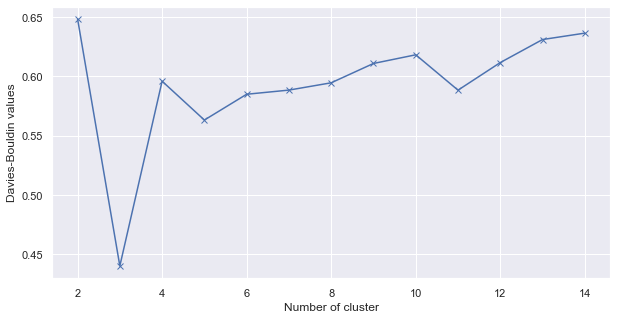

In [151]:
plt.figure(figsize=(10,5))
plt.plot(list(db.keys()), list(db.values()), "bx-")
plt.xlabel("Number of cluster")
plt.ylabel("Davies-Bouldin values")
plt.show()

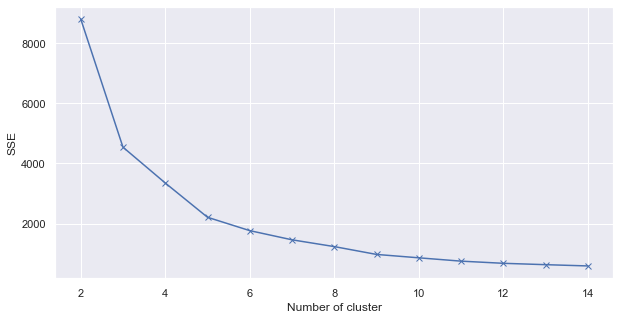

In [152]:
plt.figure(figsize=(10,5))
plt.plot(list(sse.keys()), list(sse.values()), "bx-")
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [153]:
cluster =  KMeans(n_clusters=3, n_jobs=-1, random_state=10)

In [154]:
X["cl"] = Xs["cl"] = Xp["cl"] = [str(x) for x in cluster.fit_predict(Xs)]

C:\Users\Ideapad\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [156]:
X.reset_index(inplace=True)

In [176]:
Y = df_score.merge(X, how='left', on=['alcaldia_hechos', 'longitud', 'latitud', 'n_count'])

In [177]:
Y.drop(columns=['alcaldia_hechos', 'longitud', 'latitud'],inplace=True)

In [178]:
Y.groupby("cl").mean().style.background_gradient(cmap='Blues')

,n_count,DELITO DE BAJO IMPACTO,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,HECHO NO DELICTIVO,ROBO A NEGOCIO CON VIOLENCIA,ROBO A CASA HABITACIÓN CON VIOLENCIA,ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA,VIOLACIÓN,ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA,ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,HOMICIDIO DOLOSO,ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA,SECUESTRO,FEMINICIDIO,n_delitos_x,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,n_delitos_y
cl,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.093418,0.874696,0.008373,0.000000,0.000000,0.086243,0.015388,0.000000,0.000000,0.003012,0.000000,0.000000,0.008061,0.004020,0.000000,0.000000,0.000206,0.000001,47.910910,0.082331,0.081826,0.085610,0.080925,0.091541,0.088170,0.076638,0.082194,0.076841,0.107371,0.078125,0.068428,0.164119,0.171868,0.109916,0.099342,0.147253,0.152794,0.154708,47.910910
1,4.982026,0.607543,0.107435,0.159575,0.009906,0.002614,0.002726,0.005832,0.008709,0.000020,0.001300,0.004591,0.001658,0.001039,0.002315,0.084737,0.000000,0.000000,14.168961,0.083766,0.083648,0.089475,0.083191,0.089117,0.086914,0.079147,0.081607,0.077603,0.086319,0.085374,0.073838,0.159718,0.141946,0.147264,0.110069,0.147686,0.143743,0.149575,14.168961
2,17.697238,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.028398,0.116906,0.107956,0.122983,0.076243,0.097238,0.082652,0.062541,0.057790,0.056575,0.063978,0.075249,0.079890,0.152044,0.131271,0.185635,0.131934,0.133039,0.131823,0.134254,5.028398


De acuerdo al perfilamiento anterior, se tendrian 3 categorias: 

- Cluster 0 : Se determinarian como inseguridad de nivel alto
- Cluster 1 : Se determinarian como inseguridad de nivel medio
- Cluster 2 : Se determinarian como inseguridad de nivel bajo

Esto fue determinado a nivel alcaldia, esto lo cual podria clasificar cada cierto tiempo asignarles un nivel de incidencia

Algo curioso es que aquellos dentro del nivel de inseguridad bajo realizan descripciones del delito mas amplias